# Matplotlib: Cars Dataset

In this notebook you will visualize the cars dataset using Matplotlib.

## Imports

In [1]:
import numpy as np
import pandas as pd
from altair import *

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

## Dataset

In [3]:
cars = load_dataset('cars')

In [4]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


## Scatterplot of displacement versus acceleration 

Use Matplotlib to create a scatterplot of displacement (y) versus acceleration versus (x):

* Use an alpha of 0.5
* Use the `data` keyword argument of Matplotlib to pass in the data.
* Label the x- and y- axes and plot title.
* Use x and y gridlines.

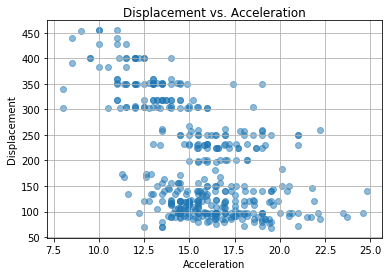

In [5]:
plt.scatter('Acceleration', 'Displacement', data=cars, marker='o', alpha=0.5)
plt.title("Displacement vs. Acceleration")
plt.grid()
ax = plt.axes()
ax.set(xlabel='Acceleration', ylabel='Displacement')

# Average horsepower by year

Create a new `DataFrame`, named `hp_year`, with two columns:

* The year of the date only (`YearOnly`).
* The average horsepower for each year.

In [6]:
cars['Year'].iloc[0]

'1970-01-01'

In [7]:
from datetime import datetime

In [8]:
stripped = cars.Year.iloc[2].replace('-', '')

In [9]:
stripped

'19700101'

In [10]:
rep = datetime.strptime(stripped, '%Y%m%d')

In [11]:
type(rep.year)

int

In [12]:
def to_year(x):
    stripped = x.replace('-', '')
    return datetime.strptime(stripped, '%Y%m%d').year

In [13]:
hp_year = cars.groupby('Year', as_index=False)['Horsepower'].mean()

In [14]:
hp_year.head()

,Year,Horsepower
0,1970-01-01,148.857143
1,1971-01-01,104.928571
2,1972-01-01,120.178571
3,1973-01-01,130.475000
4,1974-01-01,94.230769


In [15]:
hp_year['Year'] = hp_year.Year.apply(to_year)

In [16]:
hp_year['YearOnly'] = hp_year['Year']

In [17]:
hp_year = hp_year.drop('Year', axis=1)

In [18]:
hp_year = hp_year.loc[:, ['YearOnly', 'Horsepower']]

In [19]:
hp_year.head()

,YearOnly,Horsepower
0,1970,148.857143
1,1971,104.928571
2,1972,120.178571
3,1973,130.475000
4,1974,94.230769


In [20]:
assert list(hp_year.columns)==['YearOnly', 'Horsepower']
assert list(hp_year.YearOnly.unique())==[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1982]
assert len(hp_year)==12

Use Matplotlib to create a line chart of average horsepower (y) versus year (x):

* Out both lines and points on your chart.
* Use the `data` keyword argument.
* Label the x- and y- axes and plot title.
* Use x and y axes gridlines.

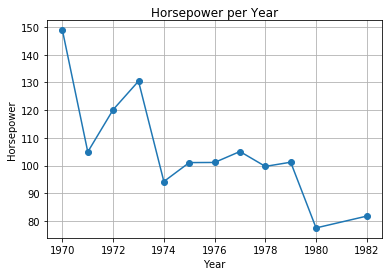

In [21]:
plt.plot('YearOnly', 'Horsepower', data=hp_year, linestyle='-', marker='o')
plt.grid()
ax = plt.axes()
ax.set(title='Horsepower per Year', xlabel='Year', ylabel='Horsepower')

## Displacement histogram

Use Matplotlib to create a histogram of the displacement:

* Use the `data` keyword argument.
* Set the number of bins appropriately.
Label the x- and y- axes and plot title.
* Use y axes gridlines.

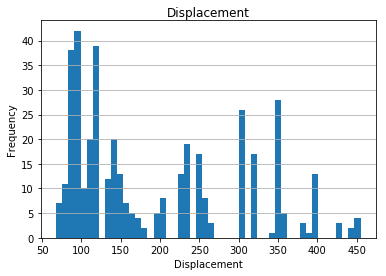

In [22]:
plt.hist('Displacement', bins=50, data=cars, histtype='bar')
plt.grid(b=True, which='major', axis='y')
plt.axes().set(title='Displacement', 
               ylabel='Frequency', 
               xlabel='Displacement');